# **Homework 1**
# **Brain stroke prediction**
# MIMUW XAI WINTER 2022/2023

For this homework we use  [*brain stroke*](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset) dataset from keggle

# Setup environment

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd


# Load dataset

In [22]:
df = pd.read_csv ("brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Preprocessing and data manipulation


Dataset consists of features that are nonnumerical. Let's  hot encode them first.

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# features_2_one_hot = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

df_one_hot = pd.get_dummies(df, drop_first = True)
df_one_hot
# transformer = make_column_transformer(
#     (OneHotEncoder(), features_2_one_hot),
#     remainder='passthrough')

# transformed = transformer.fit_transform(df)
# df_one_hot = pd.DataFrame(
#     transformed, 
#     columns=transformer.get_feature_names_out()
# )
# df_one_hot

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,1,0,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,1,1,0,0,1,0,0,1
3,79.0,1,0,174.12,24.0,1,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,0,1,1,1,0,0,1,0,0,1
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,0,0,0,0,1


# Preparing train and test samples


In [25]:
X = df_one_hot.drop("stroke", axis=1)
y = df_one_hot.stroke
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.2, random_state=42)

# Training models

## Logistic regression model

In [26]:
model = LogisticRegression(solver='liblinear', random_state = 0).fit(X_train, y_train)
logistic_predictions = model.predict(X_test)
logistic_acc = accuracy_score(logistic_predictions,y_test)
logistic_acc

0.9458375125376128

Logistic regression model achieved 95% accuracy.

## Random forest classifier model

In [27]:
random_forest = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
predictions_random_forest = random_forest.predict(X_test)
random_forest_acc = accuracy_score(predictions_random_forest,y_test)
random_forest_acc

0.9458375125376128

Random forest classifier model achieved 95% accuracy.

## XGB Classifier

In [28]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_predict=xgb.predict(X_test)
xgb_acc=accuracy_score(xgb_predict,y_test)
xgb_acc

0.9458375125376128

XGBClassifier model achieved 95% accuracy.

# Comparison of achived accuracies

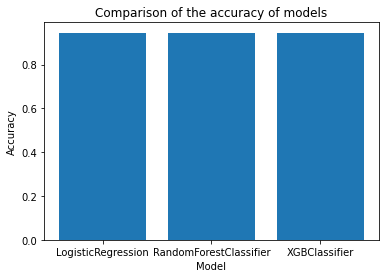

In [29]:
import matplotlib.pyplot as plt
   
model_name = ['LogisticRegression','RandomForestClassifier','XGBClassifier']
accuracies = [logistic_acc,random_forest_acc,xgb_acc]

plt.bar(model_name, accuracies)
plt.title('Comparison of the accuracy of models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Comment: We observe that these 3 models have the same accuracy.

# What changes if we omit a few features

In this section we check if droping a few columns changes anything. 

In [32]:
X = df_one_hot.drop(["gender_Male", "ever_married_Yes", "work_type_Private", "work_type_Self-employed", "work_type_children", "Residence_type_Urban", "smoking_status_formerly smoked", "smoking_status_never smoked", "smoking_status_smokes", "stroke"], axis=1)
y = df_one_hot.stroke
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', random_state = 0).fit(X_train, y_train)
logistic_predictions = model.predict(X_test)
logistic_acc = accuracy_score(logistic_predictions,y_test)
print( logistic_acc )

random_forest = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
predictions_random_forest = random_forest.predict(X_test)
random_forest_acc = accuracy_score(predictions_random_forest,y_test)
print( random_forest_acc )

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_predict=xgb.predict(X_test)
xgb_acc=accuracy_score(xgb_predict,y_test)
print( xgb_acc )


0.9458375125376128
0.9458375125376128
0.9458375125376128


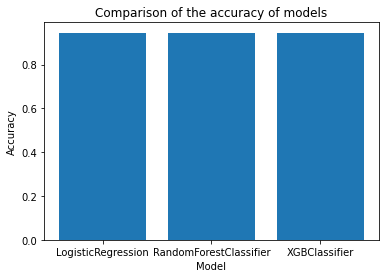

In [33]:
import matplotlib.pyplot as plt
   
model_name = ['LogisticRegression','RandomForestClassifier','XGBClassifier']
accuracies = [logistic_acc,random_forest_acc,xgb_acc]

plt.bar(model_name, accuracies)
plt.title('Comparison of the accuracy of models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Comment: We observe that results did not change.